In [1]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

f_path = "/Library/Fonts/AppleGothic.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [2]:
pinkwink_web = pd.read_csv('../data/07_PW_Web.csv',
                           encoding='utf-8', thousands=',',
                           names = ['date', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 1. 1.,238
16. 1. 2.,316
16. 1. 3.,303
16. 1. 4.,645
16. 1. 5.,753


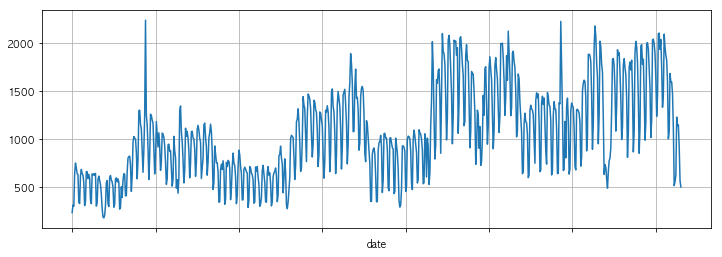

In [3]:
pinkwink_web['hit'].plot(figsize=(12,4),grid=True)

In [4]:
pinkwink_web['cnt'] = np.arange(0, len(pinkwink_web),1)
pinkwink_web.head()

,hit,cnt
date,,
16. 1. 1.,238,0
16. 1. 2.,316,1
16. 1. 3.,303,2
16. 1. 4.,645,3
16. 1. 5.,753,4


In [5]:
fp1 = np.polyfit(pinkwink_web['cnt'], pinkwink_web['hit'],1)
fp1

array([  1.33240162, 573.15630957])

In [6]:
f1 = np.poly1d(fp1)
f1

poly1d([  1.33240162, 573.15630957])

In [7]:
np.poly1d ([1,1]) + np.poly1d ([1,-1])

poly1d([2, 0])

In [8]:
np.poly1d ([1,1]) * np.poly1d ([1,-1])

poly1d([ 1,  0, -1])

In [9]:
np.poly1d ([1, -2 ,1]) / np.poly1d ([1,-1])

(poly1d([ 1., -1.]), poly1d([0.]))

In [10]:
f1 = np.poly1d(fp1)
f1

poly1d([  1.33240162, 573.15630957])

In [11]:
f1(400)

1106.1169567665693

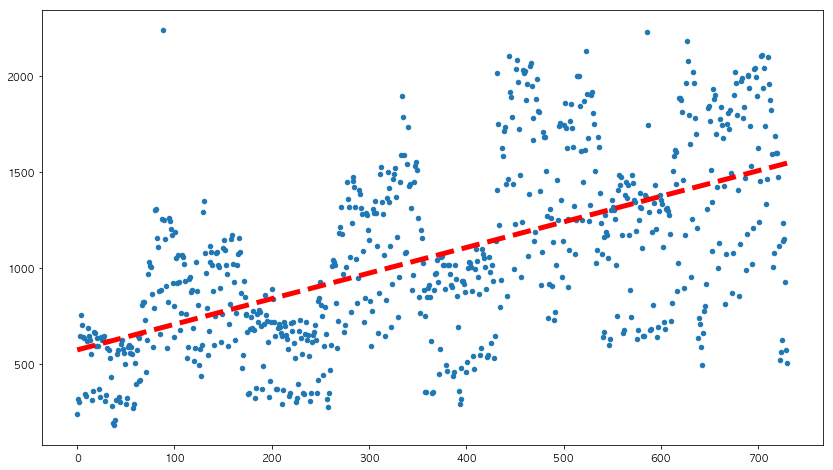

In [12]:
plt.figure(figsize=(14,8))
plt.scatter(pinkwink_web['cnt'],pinkwink_web['hit'], s=20)
plt.plot(pinkwink_web['cnt'], f1(pinkwink_web['cnt']), ls='dashed', lw=5,
         color='r')
plt.show()

In [13]:
raw_data = np.genfromtxt('../data/x09.txt', skip_header=36)
raw_data


array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

<IPython.core.display.Javascript object>


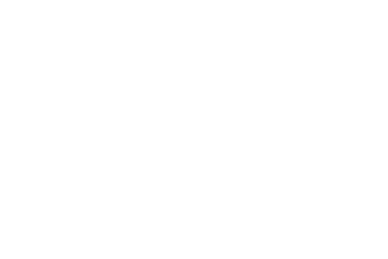

<IPython.core.display.Javascript object>


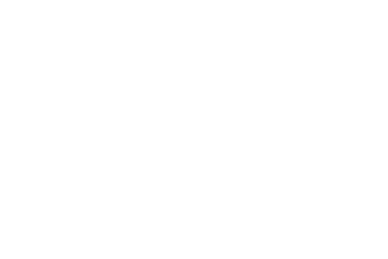

In [14]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [15]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import  RMSprop

np.random.seed(13)

/Users/seojiwon/Documents/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)
y_data = y_data.reshape((25,1))

rmsprop = RMSprop(lr=0.01)

In [17]:
model = Sequential()
model.add(Dense(1, input_shape=(2,)))
model.compile(loss='mse', optimizer=rmsprop)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


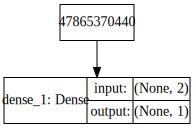

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [19]:
hist = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
25/25 [==============================] - 0s 4ms/step - loss: 134896.7344
Epoch 2/1000
25/25 [==============================] - 0s 61us/step - loss: 132375.2031
Epoch 3/1000
25/25 [==============================] - 0s 144us/step - loss: 130569.5000
Epoch 4/1000
25/25 [==============================] - 0s 90us/step - loss: 129071.4922
Epoch 5/1000
25/25 [==============================] - 0s 67us/step - loss: 127751.9062
Epoch 6/1000
25/25 [==============================] - 0s 89us/step - loss: 126550.8125
Epoch 7/1000
25/25 [==============================] - 0s 128us/step - loss: 125434.8438
Epoch 8/1000
25/25 [==============================] - 0s 105us/step - loss: 124383.3125
Epoch 9/1000
25/25 [==============================] - 0s 61us/step - loss: 123382.3203
Epoch 10/1000
25/25 [==============================] - 0s 68us/step - loss: 122422.1016
Epoch 11/1000
25/25 [==============================] - 0s 74us/step - loss: 121495.4531
Epoch 12/1000
25/25 [==================

Epoch 95/1000
25/25 [==============================] - 0s 237us/step - loss: 66771.5625
Epoch 96/1000
25/25 [==============================] - 0s 308us/step - loss: 66237.3438
Epoch 97/1000
25/25 [==============================] - 0s 169us/step - loss: 65705.4766
Epoch 98/1000
25/25 [==============================] - 0s 125us/step - loss: 65175.9453
Epoch 99/1000
25/25 [==============================] - 0s 68us/step - loss: 64648.7617
Epoch 100/1000
25/25 [==============================] - 0s 284us/step - loss: 64123.9297
Epoch 101/1000
25/25 [==============================] - 0s 234us/step - loss: 63601.4336
Epoch 102/1000
25/25 [==============================] - 0s 134us/step - loss: 63081.2852
Epoch 103/1000
25/25 [==============================] - 0s 81us/step - loss: 62563.4844
Epoch 104/1000
25/25 [==============================] - 0s 83us/step - loss: 62048.0312
Epoch 105/1000
25/25 [==============================] - 0s 90us/step - loss: 61534.9102
Epoch 106/1000
25/25 [========

Epoch 188/1000
25/25 [==============================] - 0s 95us/step - loss: 27058.5859
Epoch 189/1000
25/25 [==============================] - 0s 260us/step - loss: 26740.1543
Epoch 190/1000
25/25 [==============================] - 0s 128us/step - loss: 26424.0059
Epoch 191/1000
25/25 [==============================] - 0s 79us/step - loss: 26110.1445
Epoch 192/1000
25/25 [==============================] - 0s 84us/step - loss: 25798.5684
Epoch 193/1000
25/25 [==============================] - 0s 129us/step - loss: 25489.2656
Epoch 194/1000
25/25 [==============================] - 0s 69us/step - loss: 25182.2480
Epoch 195/1000
25/25 [==============================] - 0s 97us/step - loss: 24877.5098
Epoch 196/1000
25/25 [==============================] - 0s 66us/step - loss: 24575.0508
Epoch 197/1000
25/25 [==============================] - 0s 123us/step - loss: 24274.8633
Epoch 198/1000
25/25 [==============================] - 0s 67us/step - loss: 23976.9570
Epoch 199/1000
25/25 [======

Epoch 281/1000
25/25 [==============================] - 0s 85us/step - loss: 7020.1533
Epoch 282/1000
25/25 [==============================] - 0s 93us/step - loss: 6906.5371
Epoch 283/1000
25/25 [==============================] - 0s 69us/step - loss: 6794.9702
Epoch 284/1000
25/25 [==============================] - 0s 51us/step - loss: 6685.4531
Epoch 285/1000
25/25 [==============================] - 0s 74us/step - loss: 6577.9756
Epoch 286/1000
25/25 [==============================] - 0s 68us/step - loss: 6472.5332
Epoch 287/1000
25/25 [==============================] - 0s 73us/step - loss: 6369.1191
Epoch 288/1000
25/25 [==============================] - 0s 58us/step - loss: 6267.7275
Epoch 289/1000
25/25 [==============================] - 0s 70us/step - loss: 6168.3511
Epoch 290/1000
25/25 [==============================] - 0s 57us/step - loss: 6070.9844
Epoch 291/1000
25/25 [==============================] - 0s 52us/step - loss: 5975.6162
Epoch 292/1000
25/25 [=====================

Epoch 375/1000
25/25 [==============================] - 0s 85us/step - loss: 3227.7151
Epoch 376/1000
25/25 [==============================] - 0s 118us/step - loss: 3219.4712
Epoch 377/1000
25/25 [==============================] - 0s 113us/step - loss: 3211.1609
Epoch 378/1000
25/25 [==============================] - 0s 98us/step - loss: 3202.7932
Epoch 379/1000
25/25 [==============================] - 0s 135us/step - loss: 3194.3743
Epoch 380/1000
25/25 [==============================] - 0s 144us/step - loss: 3185.9131
Epoch 381/1000
25/25 [==============================] - 0s 84us/step - loss: 3177.4160
Epoch 382/1000
25/25 [==============================] - 0s 111us/step - loss: 3168.8875
Epoch 383/1000
25/25 [==============================] - 0s 100us/step - loss: 3160.3357
Epoch 384/1000
25/25 [==============================] - 0s 95us/step - loss: 3151.7654
Epoch 385/1000
25/25 [==============================] - 0s 106us/step - loss: 3143.1819
Epoch 386/1000
25/25 [==============

Epoch 469/1000
25/25 [==============================] - 0s 64us/step - loss: 2517.0271
Epoch 470/1000
25/25 [==============================] - 0s 64us/step - loss: 2510.9060
Epoch 471/1000
25/25 [==============================] - 0s 69us/step - loss: 2504.8159
Epoch 472/1000
25/25 [==============================] - 0s 71us/step - loss: 2498.7795
Epoch 473/1000
25/25 [==============================] - 0s 68us/step - loss: 2492.7957
Epoch 474/1000
25/25 [==============================] - 0s 77us/step - loss: 2486.9714
Epoch 475/1000
25/25 [==============================] - 0s 75us/step - loss: 2481.0801
Epoch 476/1000
25/25 [==============================] - 0s 48us/step - loss: 2475.2686
Epoch 477/1000
25/25 [==============================] - 0s 61us/step - loss: 2469.2356
Epoch 478/1000
25/25 [==============================] - 0s 83us/step - loss: 2463.3435
Epoch 479/1000
25/25 [==============================] - 0s 71us/step - loss: 2457.4697
Epoch 480/1000
25/25 [=====================

Epoch 563/1000
25/25 [==============================] - 0s 79us/step - loss: 2072.0540
Epoch 564/1000
25/25 [==============================] - 0s 112us/step - loss: 2068.7090
Epoch 565/1000
25/25 [==============================] - 0s 106us/step - loss: 2065.3625
Epoch 566/1000
25/25 [==============================] - 0s 191us/step - loss: 2062.0735
Epoch 567/1000
25/25 [==============================] - 0s 173us/step - loss: 2058.7852
Epoch 568/1000
25/25 [==============================] - 0s 94us/step - loss: 2055.5527
Epoch 569/1000
25/25 [==============================] - 0s 62us/step - loss: 2052.3218
Epoch 570/1000
25/25 [==============================] - 0s 84us/step - loss: 2049.1484
Epoch 571/1000
25/25 [==============================] - 0s 79us/step - loss: 2045.9742
Epoch 572/1000
25/25 [==============================] - 0s 130us/step - loss: 2042.8584
Epoch 573/1000
25/25 [==============================] - 0s 142us/step - loss: 2039.7417
Epoch 574/1000
25/25 [===============

Epoch 657/1000
25/25 [==============================] - 0s 63us/step - loss: 1876.9219
Epoch 658/1000
25/25 [==============================] - 0s 156us/step - loss: 1876.0952
Epoch 659/1000
25/25 [==============================] - 0s 62us/step - loss: 1875.2629
Epoch 660/1000
25/25 [==============================] - 0s 137us/step - loss: 1874.4814
Epoch 661/1000
25/25 [==============================] - 0s 118us/step - loss: 1873.6948
Epoch 662/1000
25/25 [==============================] - 0s 66us/step - loss: 1872.9583
Epoch 663/1000
25/25 [==============================] - 0s 100us/step - loss: 1872.2170
Epoch 664/1000
25/25 [==============================] - 0s 180us/step - loss: 1871.5255
Epoch 665/1000
25/25 [==============================] - 0s 103us/step - loss: 1870.8278
Epoch 666/1000
25/25 [==============================] - 0s 147us/step - loss: 1870.1798
Epoch 667/1000
25/25 [==============================] - 0s 77us/step - loss: 1869.5258
Epoch 668/1000
25/25 [==============

25/25 [==============================] - 0s 147us/step - loss: 1855.2644
Epoch 751/1000
25/25 [==============================] - 0s 117us/step - loss: 1855.2233
Epoch 752/1000
25/25 [==============================] - 0s 99us/step - loss: 1855.1843
Epoch 753/1000
25/25 [==============================] - 0s 173us/step - loss: 1855.1434
Epoch 754/1000
25/25 [==============================] - 0s 78us/step - loss: 1855.1049
Epoch 755/1000
25/25 [==============================] - 0s 78us/step - loss: 1855.0637
Epoch 756/1000
25/25 [==============================] - 0s 102us/step - loss: 1855.0253
Epoch 757/1000
25/25 [==============================] - 0s 83us/step - loss: 1854.9850
Epoch 758/1000
25/25 [==============================] - 0s 71us/step - loss: 1854.9463
Epoch 759/1000
25/25 [==============================] - 0s 94us/step - loss: 1854.9058
Epoch 760/1000
25/25 [==============================] - 0s 52us/step - loss: 1854.8676
Epoch 761/1000
25/25 [==============================] 

Epoch 844/1000
25/25 [==============================] - 0s 116us/step - loss: 1851.6366
Epoch 845/1000
25/25 [==============================] - 0s 65us/step - loss: 1851.5975
Epoch 846/1000
25/25 [==============================] - 0s 103us/step - loss: 1851.5607
Epoch 847/1000
25/25 [==============================] - 0s 138us/step - loss: 1851.5216
Epoch 848/1000
25/25 [==============================] - 0s 134us/step - loss: 1851.4844
Epoch 849/1000
25/25 [==============================] - 0s 68us/step - loss: 1851.4453
Epoch 850/1000
25/25 [==============================] - 0s 72us/step - loss: 1851.4084
Epoch 851/1000
25/25 [==============================] - 0s 65us/step - loss: 1851.3695
Epoch 852/1000
25/25 [==============================] - 0s 99us/step - loss: 1851.3317
Epoch 853/1000
25/25 [==============================] - 0s 91us/step - loss: 1851.2928
Epoch 854/1000
25/25 [==============================] - 0s 118us/step - loss: 1851.2561
Epoch 855/1000
25/25 [================

Epoch 938/1000
25/25 [==============================] - 0s 69us/step - loss: 1848.0787
Epoch 939/1000
25/25 [==============================] - 0s 50us/step - loss: 1848.0398
Epoch 940/1000
25/25 [==============================] - 0s 58us/step - loss: 1848.0038
Epoch 941/1000
25/25 [==============================] - 0s 64us/step - loss: 1847.9650
Epoch 942/1000
25/25 [==============================] - 0s 103us/step - loss: 1847.9285
Epoch 943/1000
25/25 [==============================] - 0s 57us/step - loss: 1847.8899
Epoch 944/1000
25/25 [==============================] - 0s 70us/step - loss: 1847.8531
Epoch 945/1000
25/25 [==============================] - 0s 53us/step - loss: 1847.8146
Epoch 946/1000
25/25 [==============================] - 0s 72us/step - loss: 1847.7781
Epoch 947/1000
25/25 [==============================] - 0s 110us/step - loss: 1847.7394
Epoch 948/1000
25/25 [==============================] - 0s 63us/step - loss: 1847.7032
Epoch 949/1000
25/25 [===================

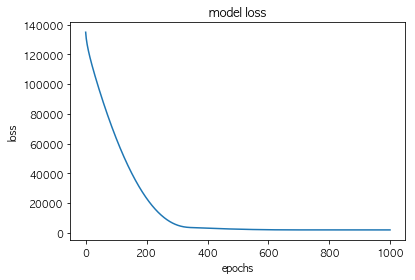

In [20]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [21]:
model.predict(np.array([100,44]).reshape(1,2))

array([[372.68344]], dtype=float32)

In [22]:
model.predict(np.array([60,25]).reshape(1,2))

array([[219.60904]], dtype=float32)

In [23]:
W_, b_ =  model.get_weights()
print('Weight is: ', W_)
print('bias is : ',b_)

Weight is:  [[1.1937457]
 [5.543399 ]]
bias is :  [9.399319]


In [24]:
x = np.linspace(20,100,50).reshape(50,1)
y = np.linspace(10,70,50).reshape(50,1)

X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_


<IPython.core.display.Javascript object>


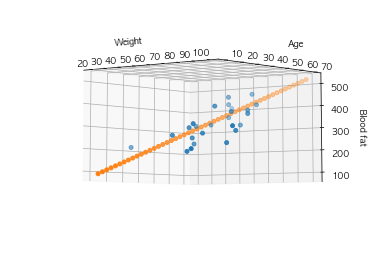

In [26]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()